<a href="https://colab.research.google.com/github/itspopoy57/Machinelearning/blob/main/04_Transfer_Learning_P2_finetune.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#FineTuning



In [1]:
###FineTuning

"""
in previous notebooks weve created a bunch of helper functions, now we can rewrite them
or we can use this

i have a file on github named helper_func.py there
all the function that ill need to use on here

"""

!wget https://raw.githubusercontent.com/itspopoy57/Machinelearning/main/extras/helper_func.py

--2023-11-01 02:45:11--  https://raw.githubusercontent.com/itspopoy57/Machinelearning/main/extras/helper_func.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_func.py’

helper_func.py      100%[===================>]  10.01K  --.-KB/s    in 0s      

2023-11-01 02:45:11 (113 MB/s) - ‘helper_func.py’ saved [10246/10246]



In [2]:
from helper_func import *

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip

--2023-11-01 02:45:15--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.6.207, 172.217.214.207, 172.253.114.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.6.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168546183 (161M) [application/zip]
Saving to: ‘10_food_classes_10_percent.zip’

10_food_classes_10_ 100%[===================>] 160.74M   180MB/s    in 0.9s    

2023-11-01 02:45:16 (180 MB/s) - ‘10_food_classes_10_percent.zip’ saved [168546183/168546183]



In [3]:
unzip_data("/content/10_food_classes_10_percent.zip")
### btw this one is because of the helper_func.py

##Lets get some data

we are getting some pretrained models at
tf.keras.applications


In [4]:
walk_through_dir("10_food_classes_10_percent")

There are 2 directories and 0 images in '10_food_classes_10_percent'.
There are 10 directories and 0 images in '10_food_classes_10_percent/test'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/fried_rice'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/ramen'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/hamburger'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/ice_cream'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/grilled_salmon'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/sushi'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/steak'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/chicken_curry'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/chicken_wings'.
There are 0 directories and 250 images in '10_food_classes_10_percent

###before we are using from tensorflow.keras.preprocessing.image import ImageDataGenerator


now we are using tf.data.Dataset
which is faster but like imagedatagenerator is still the original and this is just new and improve version


In [5]:
train_dir = "10_food_classes_10_percent/train"
test_dir = "10_food_classes_10_percent/test"


In [6]:
import tensorflow as tf
IMAGE_SIZE = (224, 224)
BATCH_SIZE = 32
train_data_10_percent = tf.keras.preprocessing.image_dataset_from_directory(directory=train_dir,
                                                                            image_size=IMAGE_SIZE,
                                                                            label_mode="categorical",
                                                                            batch_size=32)
test_data_10_percent = tf.keras.preprocessing.image_dataset_from_directory(directory=test_dir,
                                                                           image_size=IMAGE_SIZE,
                                                                           batch_size=32,
                                                                           label_mode="categorical")

Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [7]:
train_data_10_percent

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 10), dtype=tf.float32, name=None))>

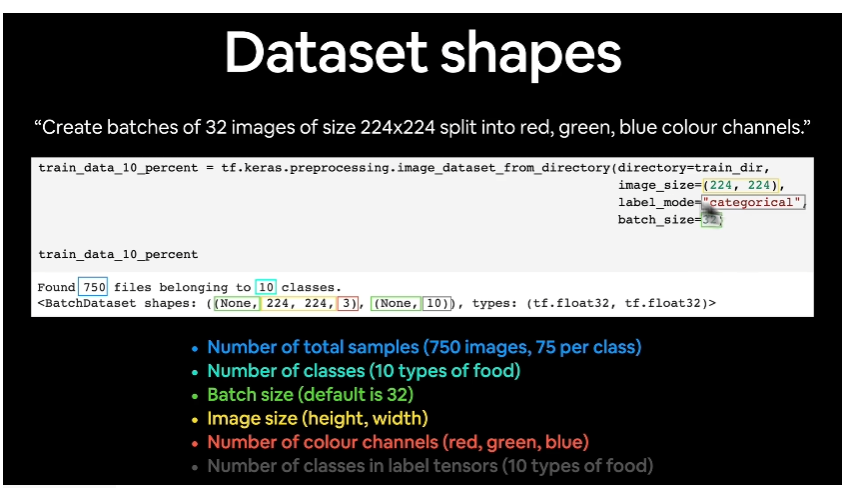

In [8]:
##  that is just a guide so that you know what are those

In [9]:
train_data_10_percent.class_names

['chicken_curry',
 'chicken_wings',
 'fried_rice',
 'grilled_salmon',
 'hamburger',
 'ice_cream',
 'pizza',
 'ramen',
 'steak',
 'sushi']

In [10]:
#see an example of a batch of data
#for images, labels in train_data_10_percent.take(1):
#  print(images, labels)

##FUNCTIONAL API VS SEQUENTIAL API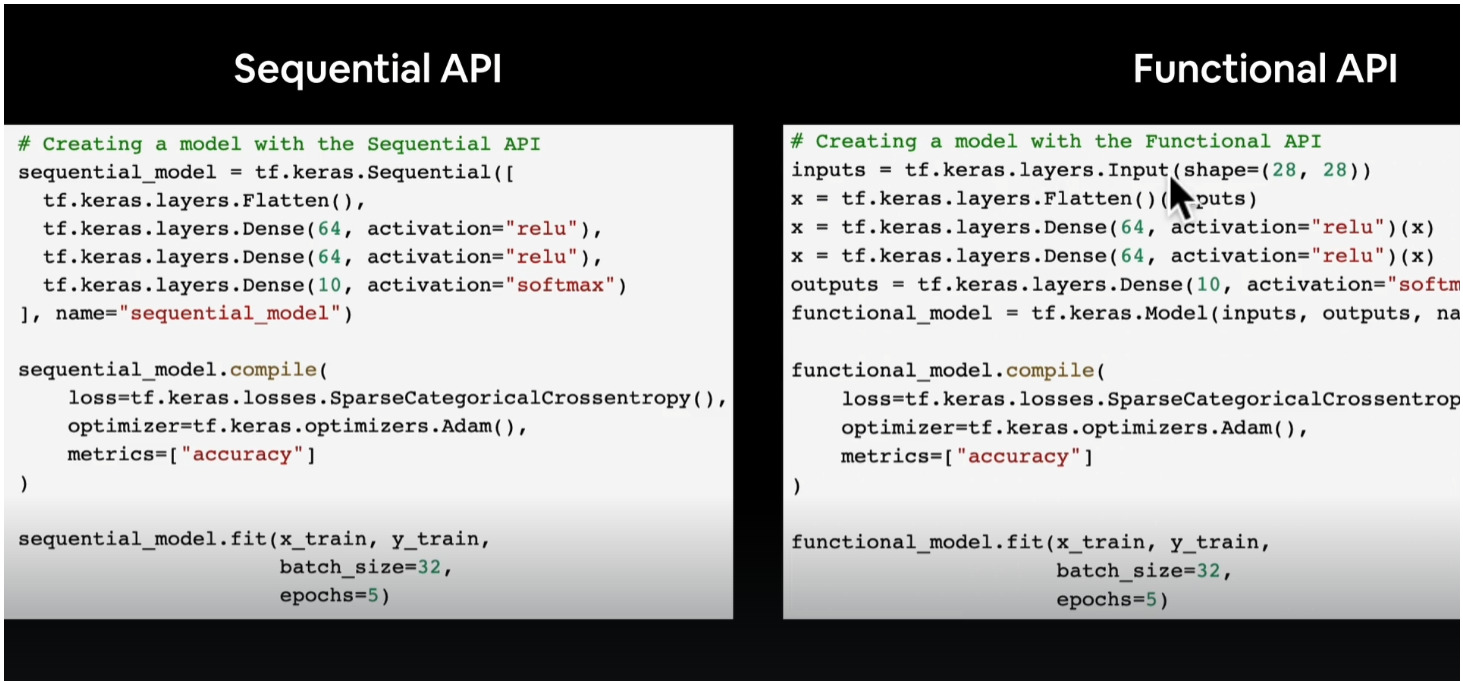

In [11]:
##########
######## new ; base_model = tf.keras.applications.efficientnet_v2.EfficientNetV2B0(include_top=False)
#########

###old : base_model = tf.keras.applications.EfficientNetB0(include_top=False)

## this is the model youll follow now

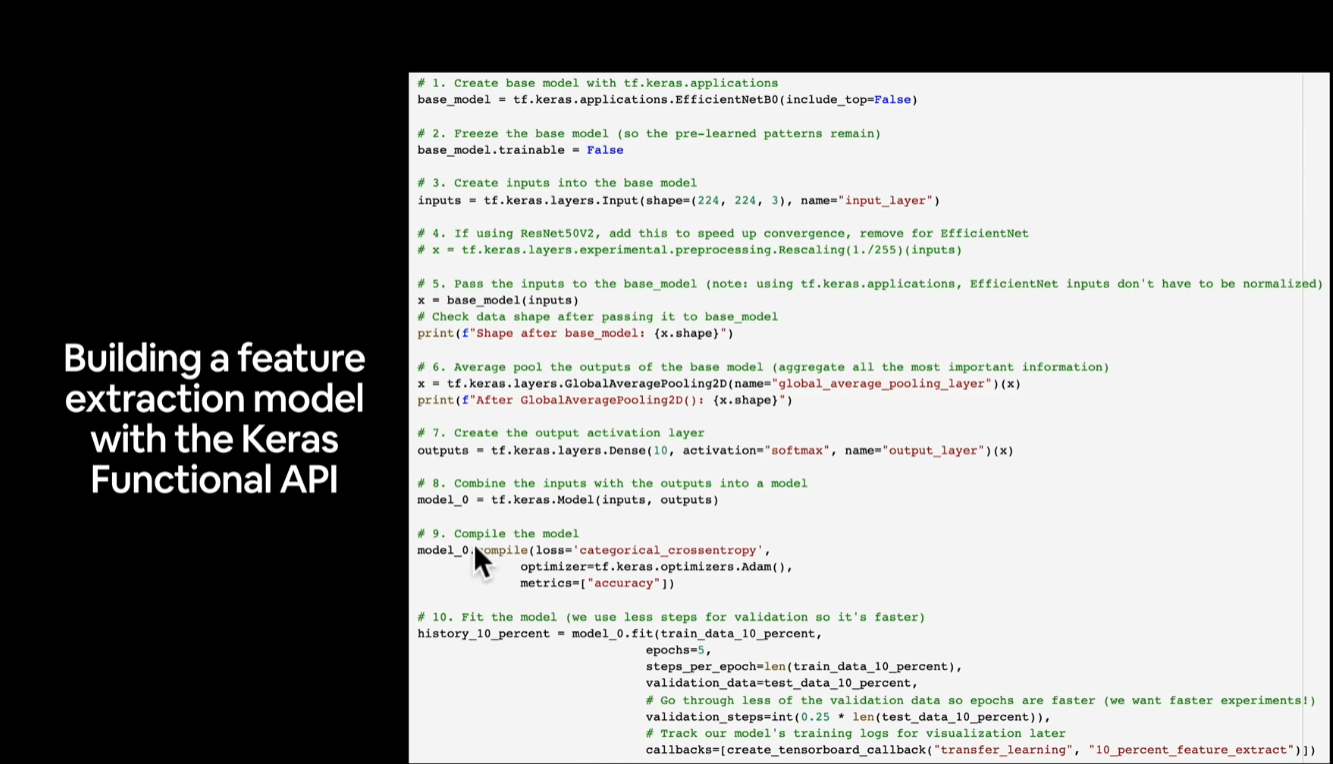

#Model 0

In [14]:
#model 0 : building a transfer learning model using keras functional api

# 1. create a base model
base_model = tf.keras.applications.efficientnet_v2.EfficientNetV2B0(include_top=False)

#this is transfer learning we have 10 output neuros and this v2b0 pretrained by imagenet has 1000 neuros
# 2. Freeze the base model (so the underlying pre trained patterns arent updatd during trainings)
base_model.trainable = False

# 3. create inputs into our model // its just a name you can change that lol
inputs = tf.keras.layers.Input(shape=(224,224,3), name="input_layer")

# 4. this is optional but If youre using ResNet50V2 you will need to normalize inputs
    #note if its not learning check the model that youre training on if theyre the same input
    #you dont need this for efficientnet because it already has built in unlike the RESNET50V2
#x = tf.keras.layers.experimental.preprocessing.Rescaling(1./255)(inputs)


# 5. Pass the inputs to the base_model
x = base_model(inputs)
print(f"Shape after passing the inputs through base model: {x.shape}")

# 6. average pool the outputs of the base model (aggregate all the most important information, reduce number of computation)
x = tf.keras.layers.GlobalAveragePooling2D(name="global_average_pooling_layer")(x)
print(f"Shape after global average pooling 2d.: {x.shape}")

# 7. Create the output activation layer
outputs = tf.keras.layers.Dense(10, activation="softmax", name="output_layer")(x)

# 8. combine the inputs with the outputs into a model
model_0 = tf.keras.Model(inputs, outputs)

# 9. Compile for the model
model_0.compile(loss=tf.keras.losses.categorical_crossentropy,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])


# 10. fit the model
history_10_percent = model_0.fit(train_data_10_percent, epochs=5,
                                  steps_per_epoch=len(train_data_10_percent),
                                  validation_data=test_data_10_percent,
                                  validation_steps=len(test_data_10_percent),
                                 callbacks=[create_tensorboard_callback(dir_name="transfer_learning",
                                                                        experiment_name="10_percent_feature_extraction")])




Shape after passing the inputs through base model: (None, 7, 7, 1280)
Shape after global average pooling 2d.: (None, 1280)
Saving TensorBoard log files to: transfer_learning/10_percent_feature_extraction/20231101-031132
Epoch 1/5
24/24 [==============================] - 17s 383ms/step - loss: 1.8994 - accuracy: 0.4027 - val_loss: 1.3455 - val_accuracy: 0.7060
Epoch 2/5
24/24 [==============================] - 7s 278ms/step - loss: 1.1571 - accuracy: 0.7413 - val_loss: 0.9114 - val_accuracy: 0.7992
Epoch 3/5
24/24 [==============================] - 8s 321ms/step - loss: 0.8459 - accuracy: 0.8253 - val_loss: 0.7266 - val_accuracy: 0.8392
Epoch 4/5
24/24 [==============================] - 8s 319ms/step - loss: 0.6895 - accuracy: 0.8373 - val_loss: 0.6339 - val_accuracy: 0.8524
Epoch 5/5
24/24 [==============================] - 7s 270ms/step - loss: 0.6016 - accuracy: 0.8653 - val_loss: 0.5781 - val_accuracy: 0.8520


In [16]:
# evaluate the full test dataset
model_0.evaluate(test_data_10_percent)

79/79 [==============================] - 5s 63ms/step - loss: 0.5781 - accuracy: 0.8520


[0.5781034827232361, 0.8519999980926514]

In [18]:
#check the layers in our base model
for layer_number, layer in enumerate(base_model.layers):
  print(layer_number, layer.name)

0 input_2
1 rescaling_1
2 normalization_1
3 stem_conv
4 stem_bn
5 stem_activation
6 block1a_project_conv
7 block1a_project_bn
8 block1a_project_activation
9 block2a_expand_conv
10 block2a_expand_bn
11 block2a_expand_activation
12 block2a_project_conv
13 block2a_project_bn
14 block2b_expand_conv
15 block2b_expand_bn
16 block2b_expand_activation
17 block2b_project_conv
18 block2b_project_bn
19 block2b_drop
20 block2b_add
21 block3a_expand_conv
22 block3a_expand_bn
23 block3a_expand_activation
24 block3a_project_conv
25 block3a_project_bn
26 block3b_expand_conv
27 block3b_expand_bn
28 block3b_expand_activation
29 block3b_project_conv
30 block3b_project_bn
31 block3b_drop
32 block3b_add
33 block4a_expand_conv
34 block4a_expand_bn
35 block4a_expand_activation
36 block4a_dwconv2
37 block4a_bn
38 block4a_activation
39 block4a_se_squeeze
40 block4a_se_reshape
41 block4a_se_reduce
42 block4a_se_expand
43 block4a_se_excite
44 block4a_project_conv
45 block4a_project_bn
46 block4b_expand_conv
47 b

In [19]:
#how about the summary of the base model
base_model.summary()

Model: "efficientnetv2-b0"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, None, None, 3)]      0         []                            
                                                                                                  
 rescaling_1 (Rescaling)     (None, None, None, 3)        0         ['input_2[0][0]']             
                                                                                                  
 normalization_1 (Normaliza  (None, None, None, 3)        0         ['rescaling_1[0][0]']         
 tion)                                                                                            
                                                                                                  
 stem_conv (Conv2D)          (None, None, None, 32)       864       ['normalizatio

In [20]:
#summary of the entire model
model_0.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetv2-b0 (Functio  (None, None, None, 1280   5919312   
 nal)                        )                                   
                                                                 
 global_average_pooling_lay  (None, 1280)              0         
 er (GlobalAveragePooling2D                                      
 )                                                               
                                                                 
 output_layer (Dense)        (None, 10)                12810     
                                                                 
Total params: 5932122 (22.63 MB)
Trainable params: 12810 (50.04 KB)
Non-trainable params: 5919312 (22.58 MB)
________________